In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st
%matplotlib inline

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

# File to Load (Remember to Change These)
ccd = "Resources/output_data.csv"

# Read Purchasing File and store into Pandas data frame
clean_city_data = pd.read_csv(ccd)

In [39]:
clean_city_data

Unnamed: 0                 City Country        Date      Lat       Lng  \
0             0       Severo-Kurilsk      RU  1619221269  50.6789  156.1250   
1             1               Atuona      PF  1619220978  -9.8000 -139.0333   
2             2              Ardakan      IR  1619221590  32.3100   54.0175   
3             3        Mar Del Plata      AR  1619221328 -38.0023  -57.5575   
4             4          Pyaozerskiy      RU  1619221590  65.8333   31.1667   
..          ...                  ...     ...         ...      ...       ...   
540         548  Pereslavl-Zalesskiy      RU  1619221715  56.7393   38.8563   
541         549       Nuevo Progreso      MX  1619221715  23.1667  -97.9500   
542         550       Ferkessedougou      CI  1619221715   9.6000   -5.2000   
543         552              Salalah      OM  1619221363  17.0151   54.0924   
544         553             Valdivia      CL  1619221716 -39.8142  -73.2459   

     Max Temp  Humidity  Cloudiness  Wind Speed Current Description  
0        2.92        88          97        3.47     overcast clouds  
1       26.85        79          28        9.99    scattered clouds  
2       26.00        18          40        2.06    scattered clouds  
3       20.56        83           0        4.12       moderate rain  
4        0.57        99         100        1.39     overcast clouds  
..        ...       ...         ...         ...                 ...  
540      6.00        95          98        1.49          light rain  
541     28.89        63          38        3.13    scattered clouds  
542     28.44        44          78        1.75       broken clouds  
543     28.00        74          40        1.54    scattered clouds  
544     10.00        87          20        1.03       moderate rain  

[545 rows x 11 columns]

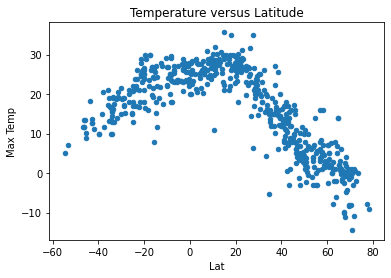

In [40]:
# Draw a scatter plot

clean_city_data.plot.scatter(x='Lat', y='Max Temp', title= "Temperature versus Latitude");

plt.show(block=True);

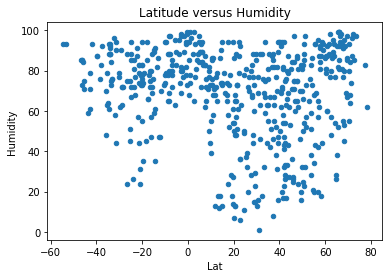

In [41]:
clean_city_data.plot.scatter(x='Lat', y='Humidity', title= "Latitude versus Humidity");

plt.show(block=True);

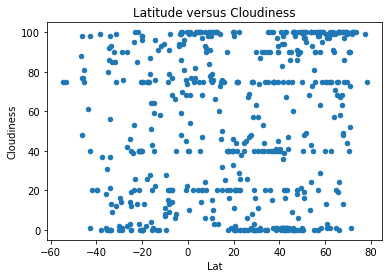

In [42]:
clean_city_data.plot.scatter(x='Lat', y='Cloudiness', title= "Latitude versus Cloudiness");

plt.show(block=True);

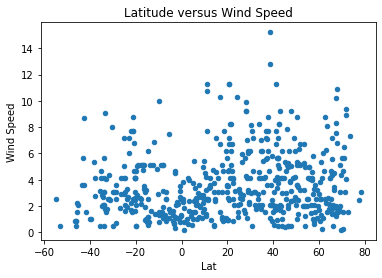

In [43]:
clean_city_data.plot.scatter(x='Lat', y='Wind Speed', title= "Latitude versus Wind Speed");

plt.show(block=True);

In [44]:
nh_df = clean_city_data[clean_city_data.Lat >= 0]
nh_df

Unnamed: 0                 City Country        Date      Lat       Lng  \
0             0       Severo-Kurilsk      RU  1619221269  50.6789  156.1250   
2             2              Ardakan      IR  1619221590  32.3100   54.0175   
4             4          Pyaozerskiy      RU  1619221590  65.8333   31.1667   
7             7           Butaritari      KI  1619221214   3.0707  172.7902   
11           11                Avera      US  1619221257  33.1940  -82.5271   
..          ...                  ...     ...         ...      ...       ...   
539         547                 Brae      GB  1619221714  60.3964   -1.3530   
540         548  Pereslavl-Zalesskiy      RU  1619221715  56.7393   38.8563   
541         549       Nuevo Progreso      MX  1619221715  23.1667  -97.9500   
542         550       Ferkessedougou      CI  1619221715   9.6000   -5.2000   
543         552              Salalah      OM  1619221363  17.0151   54.0924   

     Max Temp  Humidity  Cloudiness  Wind Speed Current Description  
0        2.92        88          97        3.47     overcast clouds  
2       26.00        18          40        2.06    scattered clouds  
4        0.57        99         100        1.39     overcast clouds  
7       27.85        77          82        3.95          light rain  
11      20.00        32          40        2.57    scattered clouds  
..        ...       ...         ...         ...                 ...  
539      7.00        81          75        0.84       broken clouds  
540      6.00        95          98        1.49          light rain  
541     28.89        63          38        3.13    scattered clouds  
542     28.44        44          78        1.75       broken clouds  
543     28.00        74          40        1.54    scattered clouds  

[379 rows x 11 columns]

In [45]:
sh_df = clean_city_data[clean_city_data.Lat < 0]
sh_df

Unnamed: 0           City Country        Date      Lat       Lng  \
1             1         Atuona      PF  1619220978  -9.8000 -139.0333   
3             3  Mar Del Plata      AR  1619221328 -38.0023  -57.5575   
5             5      Busselton      AU  1619221263 -33.6500  115.3333   
6             6       Cidreira      BR  1619221252 -30.1811  -50.2056   
8             8        Rikitea      PF  1619221200 -23.1203 -134.9692   
..          ...            ...     ...         ...      ...       ...   
517         525       Menongue      AO  1619221709 -14.6585   17.6910   
520         528    Villa Maria      AR  1619221709 -32.4075  -63.2402   
521         529   Christchurch      NZ  1619221523 -43.5333  172.6333   
529         537  Pangkalanbuun      ID  1619221712  -2.6833  111.6167   
544         553       Valdivia      CL  1619221716 -39.8142  -73.2459   

     Max Temp  Humidity  Cloudiness  Wind Speed Current Description  
1       26.85        79          28        9.99    scattered clouds  
3       20.56        83           0        4.12       moderate rain  
5       16.11        75          93        1.79     overcast clouds  
6       21.54        79           2        8.04           clear sky  
8       26.09        68         100        7.15     overcast clouds  
..        ...       ...         ...         ...                 ...  
517     15.27        59          64        1.17       broken clouds  
520     18.89        96          90        1.79     overcast clouds  
521     18.33        59          61        3.60       broken clouds  
529     26.20        81          70        1.15       broken clouds  
544     10.00        87          20        1.03       moderate rain  

[166 rows x 11 columns]

The correlation coefficient between max temp and lat is -0.89


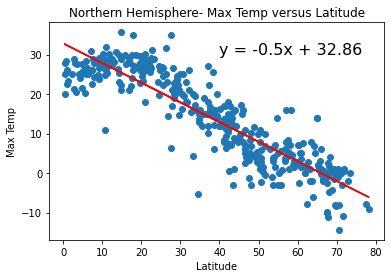

In [75]:
# linear regression model
# Northern Hemisphere Max Temp versus Latitude
x_lat = nh_df ['Lat']
y_temp = nh_df ['Max Temp']

corr = round (st.pearsonr(x_lat,y_temp) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_lat,y_temp)
r_values = x_lat* slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_lat,y_temp)
plt.plot(x_lat,r_values, "red")
plt.annotate(line_eq,(40,30),fontsize=16,color="black")
#plt.annotate(f'r = {corr}',(80,35),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere- Max Temp versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_lat,y_temp)[0],2)}")


The correlation coefficient between max temp and lat is 0.73


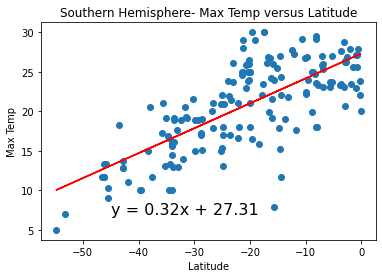

In [95]:
# linear regression model
# Southern Hemisphere Max Temp versus Latitude
x_slat = sh_df ['Lat']
y_stemp = sh_df ['Max Temp']

corr = round (st.pearsonr(x_slat,y_stemp) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_slat,y_stemp)
r_values = x_slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_slat,y_stemp)
plt.plot(x_slat,r_values, "red")
plt.annotate(line_eq,(-45,7),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere- Max Temp versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_slat,y_stemp)[0],2)}")

The correlation coefficient between max temp and lat is 0.08


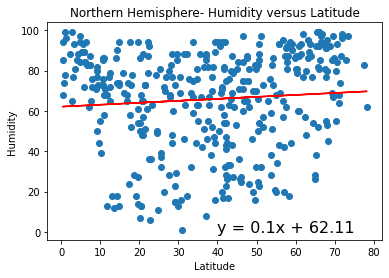

In [77]:
# linear regression model
# Northern Hemisphere Humidity versus Latitude
x_hlat = nh_df ['Lat']
y_hum = nh_df ['Humidity']

corr = round (st.pearsonr(x_hlat,y_hum) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_hlat,y_hum)
r_values = x_hlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_hlat,y_hum)
plt.plot(x_hlat,r_values, "red")
plt.annotate(line_eq,(40,0),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere- Humidity versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_hlat,y_hum)[0],2)}")

The correlation coefficient between max temp and lat is 0.09


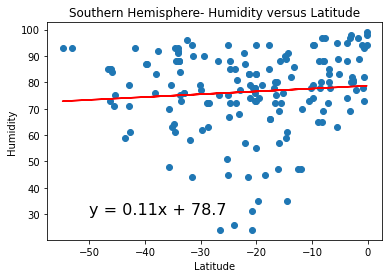

In [70]:
# linear regression model
# Southern Hemisphere Humidity versus Latitude
x_shlat = sh_df ['Lat']
y_shum = sh_df ['Humidity']

corr = round (st.pearsonr(x_shlat,y_shum) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_shlat,y_shum)
r_values = x_shlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere- Humidity versus Latitude')
plt.scatter(x_shlat,y_shum)
plt.plot(x_shlat,r_values, "red")
plt.annotate(line_eq,(-50,30),fontsize=16,color="black")
#plt.xlabel('Latitude')
#plt.ylabel('Humidity')
#plt.title('Southern Hemisphere- Humidity versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_shlat,y_shum)[0],2)}")

The correlation coefficient between max temp and lat is 0.14


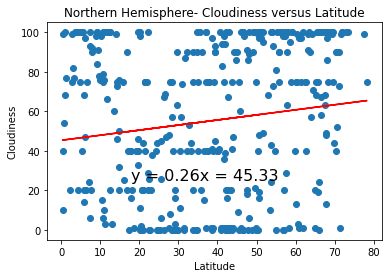

In [79]:
# linear regression model
# Northern Hemisphere Cloudiness versus Latitude
x_lt = nh_df ['Lat']
y_cld = nh_df ['Cloudiness']

corr = round (st.pearsonr(x_lt,y_cld) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_lt,y_cld)
r_values = x_lt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x = " + str(round(intercept,2))

plt.scatter(x_lt,y_cld)
plt.plot(x_lt,r_values, "red")
plt.annotate(line_eq,(18,25),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere- Cloudiness versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_lt,y_cld)[0],2)}")

The correlation coefficient between max temp and lat is 0.07


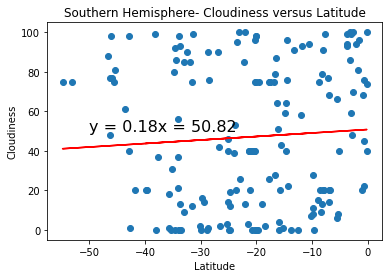

In [80]:
# linear regression model
# Southern Hemisphere Cloudiness versus Latitude
x_slt = sh_df ['Lat']
y_scld = sh_df ['Cloudiness']

corr = round (st.pearsonr(x_slt ,y_scld) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_slt ,y_scld)
r_values = x_slt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_slt ,y_scld)
plt.plot(x_slt,r_values, "red")
plt.annotate(line_eq,(-50,50),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere- Cloudiness versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_slt ,y_scld)[0],2)}")

The correlation coefficient between max temp and lat is 0.06


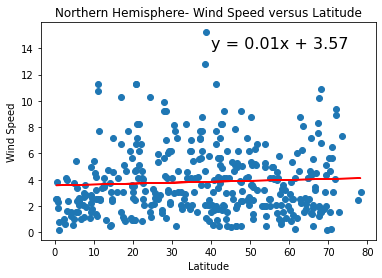

In [82]:
# linear regression model
# Northern Hemisphere Wind Speed versus Latitude
x_wlt = nh_df ['Lat']
y_ws = nh_df ['Wind Speed']

corr = round (st.pearsonr(x_wlt ,y_ws) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_wlt ,y_ws)
r_values = x_wlt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_wlt ,y_ws)
plt.plot(x_wlt,r_values, "red")
plt.annotate(line_eq,(40,14),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere- Wind Speed versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_wlt ,y_ws)[0],2)}")

The correlation coefficient between max temp and lat is -0.07


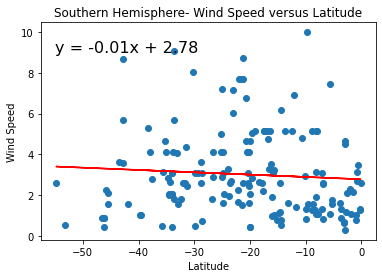

In [93]:
# linear regression model
# Southern Hemisphere Wind Speed versus Latitude
x_wslt = sh_df ['Lat']
y_shws = sh_df ['Wind Speed']

corr = round (st.pearsonr(x_wslt ,y_shws) [0],2)
(slope,intercept, rvalue,pvalue, stderr) = linregress(x_wslt, y_shws)
r_values = x_wslt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_wslt, y_shws)
plt.plot(x_wslt,r_values, "red")
plt.annotate(line_eq,(-55,9),fontsize=16,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere- Wind Speed versus Latitude')
print(f"The correlation coefficient between max temp and lat is {round(st.pearsonr(x_wslt, y_shws)[0],2)}")